In [3]:
import matplotlib.pyplot as plt
import numpy as np

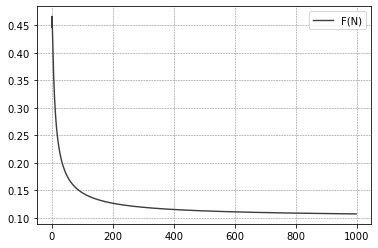

In [33]:
fN = []
for N in range(2,1000):
    epsilon = 0.005
    fN.append(0.1 + np.log(N)/N)
plt.plot(fN,color='#3D3D3D',linewidth=1.4,label='F(N)')
plt.grid(visible=True,color='gray', linestyle='dashed', linewidth=0.5)
plt.legend()
plt.savefig('images/fN.png')

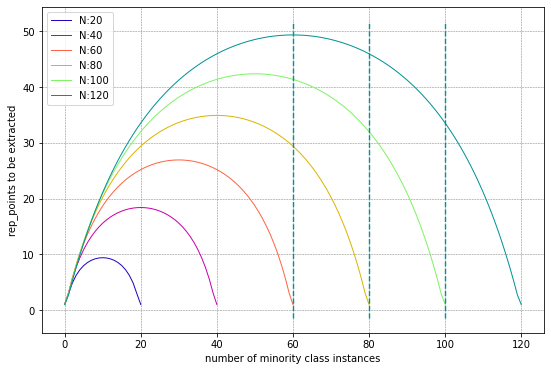

In [34]:
import colorir
grad = colorir.PolarGrad(["#2304C0","FE6546","80F365","1B205F"])
c = iter(grad.n_colors(7))
plt.figure(figsize=(9,6))
for N in [20,40,60,80,100,120]:
    size1s = []
    for num_min in range(N+1):
        p = num_min/N

        # size1 might be 0 when num_min == 0 or num_min == N, then set c = 1, choose centroid as rep_point directly
        if p==0 or p==1:
            size1 = 1

        else:
            Z = 1.64
            epsilon = 0.05
            e = epsilon + np.log(N)/N
            x = (Z**2 * p * (1-p)) / (e**2)
            size1 = (N * x) / (x + N - 1)

        size1s.append(size1)
    color = next(c)
    plt.plot(size1s,label='N:'+str(N),alpha=1, linewidth=1,color=color)
plt.grid(visible=True,color='gray', linestyle='dashed', linewidth=0.5)
y1 = plt.ylim()[0]
y2 = plt.ylim()[1]
plt.vlines(60,y1, y2, linestyles='dashed',linewidth=1.4,color=color)
plt.vlines(80,y1, y2, linestyles='dashed',linewidth=1.4,color=color)
plt.vlines(100,y1, y2,linestyles='dashed',linewidth=1.4,color=color)

plt.xlabel('number of minority class instances')
plt.ylabel('rep_points to be extracted')
plt.legend(loc = 'upper left')
#     print(num_min,'|',size1)
plt.savefig('images/rep_extract.png')